In [39]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

tips_dataframe = sns.load_dataset("tips")

In [50]:
# 데이터의 정보와 요약통계를 확인하라. (Head&Tail, 데이터 타입, Row&Columns 수, Std, Mean, NaN 수 등등 다다익선)

print('< Head >')
print(tips_dataframe.head(), end='\n\n\n')

print('< Tail >')
print(tips_dataframe.tail(), end='\n\n\n')

print('< Information >')
print(tips_dataframe.info(), end='\n\n\n')

print('< Describe >')
print(tips_dataframe.describe())

< Head >
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


< Tail >
     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


< Information >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non

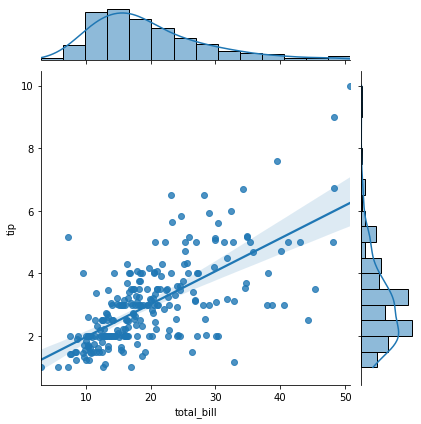

In [24]:
# 계산 금액과 팁 금액 사이에 어떠한 상관 관계가 있을 것 같다. 두 변수의 관계를 시각화하여 나타내고, 선형적 관계가 보이는지 회귀선까지 그어서 표시해라.

jop1 = sns.jointplot(x='total_bill', y='tip', kind='reg', data=tips_dataframe)

<AxesSubplot:xlabel='day', ylabel='count'>

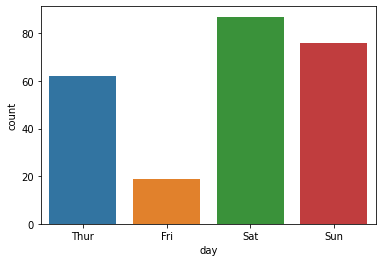

In [37]:
# 요일별로 팁의 발생 횟수가 어떻게 다른지를 시각화해서 나타내어 보아라. (Countplot 활용)

sns.countplot(x='day', data=tips_dataframe)

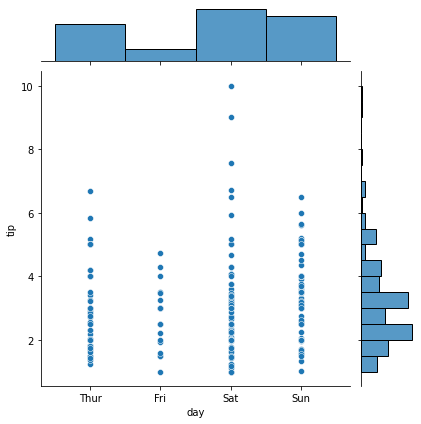

In [23]:
# 요일별 계산금액의 통계적 분포를 한눈에 보고싶다. 시각화해서 나타내어 보아라.

jop2 = sns.jointplot(x='day', y='tip', kind='scatter', data=tips_dataframe)

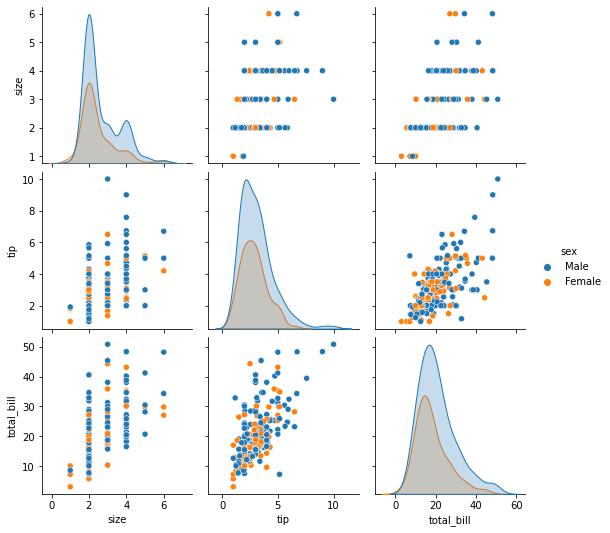

In [38]:
# 계산자의 성별에 따라서 테이블 인원수, 팁 금액, 계산금액이 어떠한 관계가 있는지 한눈에 알 수 있도록 시각화하라.

ppl = sns.pairplot(tips_dataframe, vars=["size", "tip", "total_bill"], hue="sex") # 

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


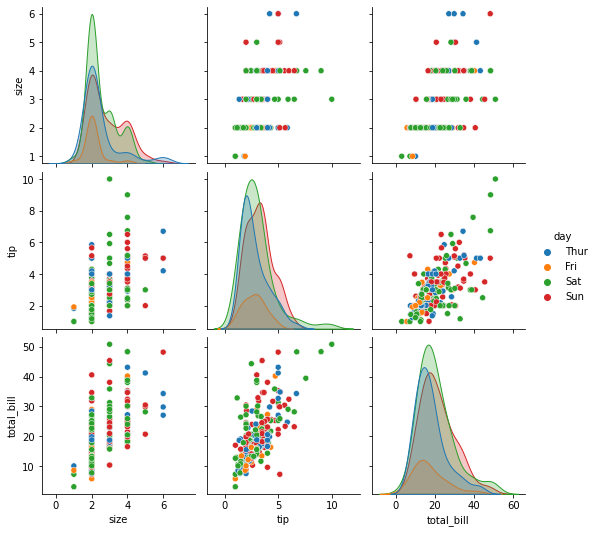

In [59]:
# 추가적인 EDA를 진행할 수 있다면 진행하고, 얻어낸 Insight로 음식점의 매출액 혹은 팁 금액을 증대시키기 위한 방안을 제시하라.

ppl = sns.pairplot(tips_dataframe, vars=["size", "tip", "total_bill"], hue="day") # 요일별 관계
print(tips_dataframe.corr())

### 월, 화, 수는 다수의 시간을 메뉴 개발 및 품질 향상을 위해 노력하고, 매장 이용이 아닌 배달 전용으로 변경!
- 손님이 없는 월, 화, 수에는 목, 금, 토, 일에 올 손님을 위한 준비를 하는 것이 더 낫다는 판단을 하였다
- 특히, 요식업이기 때문에 식사재의 변질 우려를 감소시킬 수 있고 매장 유지비, 고용비를 절감할 수 있기 때문에 더 나을 것 같다

### 목, 금, 토, 일 중에서는 토요일부터 천천히 포장과 배달 서비스 시작!
- 사람이 많이 오는 목, 금, 토, 일 중에서도 토요일이 근소한 차이로 가장 많은 손님이 몰리는 것을 알 수 있다
- 식당은 방문 가능한 손님이 정해져 있기 때문에 가장 많은 손님이 몰리는 토요일부터 배달을 시작할 필요가 있다고 느꼈다
- 한정된 식당이라는 공간 안에 들어올 수 없는 손님은 포장이나 배달로 식당과 같은 품질의 서비스를 받을 수 있도록 한다면 자리가 없어 돌아가는 손님들에 대한 해결책이 될 것이다

### 식당 구조 변경 : 2인 위주
- 현재 이 식당에는 2인이 이용하는 경우가 가장 많다
- 따라서 2인에서 4인이 이용하기 편리하도록 기본배치를 2인 위주로 한다
- 2인보다 더 많은 인원수로 방문하게 된다면 2인용 테이블을 붙여 사용하도록 한다